In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
def monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations):
    """
    Monte Carlo simulation for European call option pricing.

    Parameters:
    S0 : float
        Initial stock price
    K : float
        Strike price
    T : float
        Time to maturity (in years)
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the underlying asset
    num_simulations : int
        Number of simulations

    Returns:
    float
        Estimated option price
    """
    # Generate random standard normal variables
    Z = np.random.standard_normal(num_simulations)
    # Calculate stock price at maturity
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    # Calculate the payoff at maturity
    payoffs = np.maximum(ST - K, 0)
    # Discount back to present value
    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price

In [12]:
def black_scholes_option_price(S0, K, T, r, sigma):
    """
    Black-Scholes formula for European call option pricing.

    Parameters:
    S0 : float
        Initial stock price
    K : float
        Strike price
    T : float
        Time to maturity (in years)
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the underlying asset

    Returns:
    float
        Option price
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S0 * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

In [13]:
# Parameters
S0 = 100          # Initial stock price
K = 100           # Strike price
T = 1.0           # Time to maturity (1 year)
r = 0.05          # Risk-free interest rate
sigma = 0.3       # Volatility

In [14]:
# Calculate Black-Scholes price once
bs_price = black_scholes_option_price(S0, K, T, r, sigma)

In [15]:
# Number of simulations
simulation_numbers = [10**i for i in range(1, 8)]  # 10, 100, ..., 10,000,000
errors = []

In [19]:
print("Number of Simulations | Monte Carlo Price | Error")
print("-----------------------------------------------")
for num_simulations in simulation_numbers:
    mc_price = monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations)
    error = mc_price - bs_price
    errors.append(error)
    print(f"{num_simulations:>20} | {mc_price:.6f}         | {error:.6f}")

Number of Simulations | Monte Carlo Price | Error
-----------------------------------------------
                  10 | 14.523823         | 0.292568
                 100 | 16.111613         | 1.880358
                1000 | 14.438794         | 0.207539
               10000 | 14.319798         | 0.088543
              100000 | 14.401857         | 0.170602
             1000000 | 14.193960         | -0.037295
            10000000 | 14.228450         | -0.002805


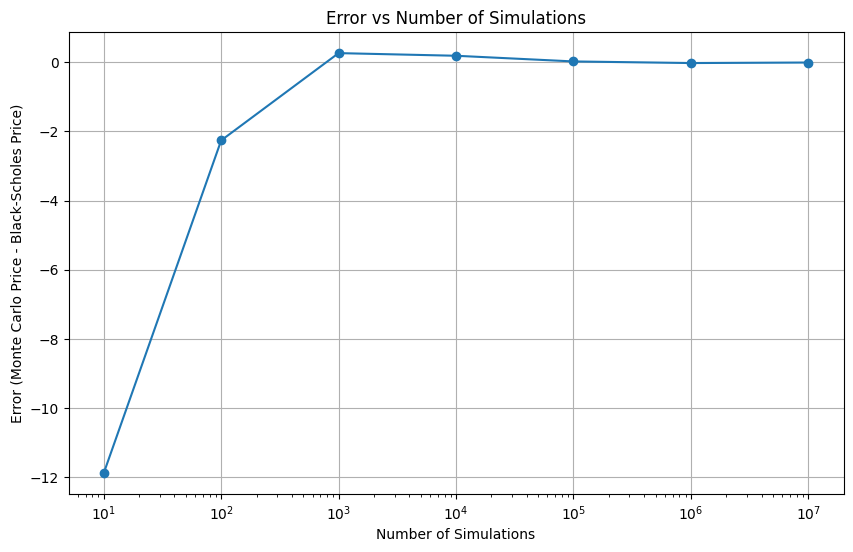

In [18]:
# Plot the error vs number of simulations
plt.figure(figsize=(10, 6))
plt.plot(simulation_numbers, errors, marker='o')
plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Error (Monte Carlo Price - Black-Scholes Price)')
plt.title('Error vs Number of Simulations')
plt.grid(True)
plt.show()